In [2]:
import pandas as pd
import numpy as np

In [3]:
file_path = "../data/raw/kaggle_survey_2017_2021.csv"
df = pd.read_csv(file_path, low_memory=False )

In [4]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (106302, 293)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


In [6]:
df.isnull().sum().head(20)

-                                           0
Time from Start to Finish (seconds)     16716
Q1                                        445
Q2                                         95
Q3                                        121
Q4                                       2983
Q5                                       7214
Q6                                      13516
Q7_Part_1                               40359
Q7_Part_2                               85417
Q7_Part_3                               73211
Q7_Part_4                               96605
Q7_Part_5                               94683
Q7_Part_6                               91899
Q7_Part_7                               93551
Q7_Part_8                              105504
Q7_Part_9                              105861
Q7_Part_10                              97564
Q7_Part_11                              96981
Q7_Part_12                             106301
dtype: int64

In [7]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 4456


In [8]:
df.describe().T

,count,unique,top,freq
-,106302,6,2021,25973
Time from Start to Finish (seconds),89586,11716,394,107
Q1,105857,12,25-29,23748
Q2,106207,10,Male,49178
Q3,106181,78,India,25192
...,...,...,...,...
Q38_B_Part_6,1287,2,Guild.ai,1286
Q38_B_Part_7,1218,2,Polyaxon,1217
Q38_B_Part_9,1186,2,Domino Model Monitor,1185
Q38_B_Part_11,1,1,"In the next 2 years, do you hope to become mor...",1


In [9]:
df = df.drop(0).reset_index(drop=True)

In [10]:
df = df.drop_duplicates()

In [6]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].map(lambda x: x.replace("â€™", "'") if isinstance(x, str) else x)

In [13]:
df["Time from Start to Finish (seconds)"] = pd.to_numeric(
    df["Time from Start to Finish (seconds)"], errors="coerce"
)

In [14]:
print("Shape after cleaning:", df.shape)

Shape after cleaning: (101845, 293)


In [15]:
import pandas as pd
import numpy as np

def preprocess_survey(df):
    # 1. Drop metadata row (already done earlier, but keep safe)
    if df.iloc[0].str.contains("What is your age", case=False, na=False).any():
        df = df.drop(0).reset_index(drop=True)

    # 2. Ordinal Encoding
    # Age (Q1)
    age_order = {
        "18-21": 1, "22-24": 2, "25-29": 3, "30-34": 4,
        "35-39": 5, "40-44": 6, "45-49": 7, "50-54": 8,
        "55-59": 9, "60-69": 10, "70+": 11
    }
    df["Q1"] = df["Q1"].map(age_order)
    
    # Education (Q4)
    edu_order = {
        "No formal education past high school": 1,
        "Some college/university study without earning a bachelor’s degree": 2,
        "Bachelor’s degree": 3,
        "Master’s degree": 4,
        "Doctoral degree": 5
    }
    df["Q4"] = df["Q4"].replace(edu_order)
    
    # Years coding (Q6)
    coding_order = {
        "I have never written code": 0,
        "Less than 1 year": 1,
        "1-3 years": 2,
        "3-5 years": 3,
        "5-10 years": 4,
        "10-20 years": 5,
        "20+ years": 6
    }
    df["Q6"] = df["Q6"].replace(coding_order)
    
    # 3. Nominal Variables → One-hot Encoding
    # Gender (Q2)
    df = pd.get_dummies(df, columns=["Q2"], prefix="Gender")
    
    # Country (Q3) → keep top 10, group others
    top_countries = df["Q3"].value_counts().nlargest(10).index
    df["Q3"] = df["Q3"].where(df["Q3"].isin(top_countries), "Other")
    df = pd.get_dummies(df, columns=["Q3"], prefix="Country")
    
    # Job Title (Q5)
    df = pd.get_dummies(df, columns=["Q5"], prefix="Role")

    # 4. Multi-select Questions (Q7+, Q38+, etc.)
    multi_cols = [col for col in df.columns if "_Part_" in col or "_OTHER" in col]
    df[multi_cols] = df[multi_cols].notna().astype(int)

    # 5. Numeric Conversion
    if "Time from Start to Finish (seconds)" in df.columns:
        df["Time from Start to Finish (seconds)"] = pd.to_numeric(
            df["Time from Start to Finish (seconds)"], errors="coerce"
        )
    
    return df


In [16]:
file_path = "../data/raw/kaggle_survey_2017_2021.csv"
df = pd.read_csv(file_path, low_memory=False)

df = df.drop(0).reset_index(drop=True)
df = df.drop_duplicates()

df_processed = preprocess_survey(df)

print("Shape after preprocessing:", df_processed.shape)
df_processed.head()

Shape after preprocessing: (101845, 344)


,-,Time from Start to Finish (seconds),Q1,Q4,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,...,Role_Programmer,Role_Research Assistant,Role_Research Scientist,Role_Researcher,Role_Salesperson,Role_Scientist/Researcher,Role_Software Developer/Software Engineer,Role_Software Engineer,Role_Statistician,Role_Student
0,2021,910.0,8.0,Bachelorâ€™s degree,4,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2021,784.0,8.0,Masterâ€™s degree,6,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,2021,924.0,2.0,Masterâ€™s degree,2,1,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
3,2021,575.0,7.0,5,6,1,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,2021,781.0,7.0,5,< 1 years,1,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

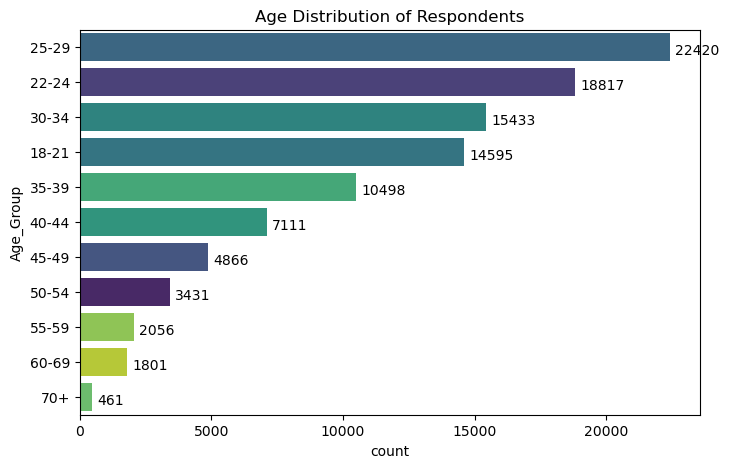

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping back to age ranges
age_map = {
    1: "18-21",
    2: "22-24",
    3: "25-29",
    4: "30-34",
    5: "35-39",
    6: "40-44",
    7: "45-49",
    8: "50-54",
    9: "55-59",
    10: "60-69",
    11: "70+"
}

plt.figure(figsize=(8,5))
ax = sns.countplot(
    y="Age_Group", 
    data=df, 
    order=df["Age_Group"].value_counts().index, 
    hue="Age_Group",   # explicitly set hue
    dodge=False,       # ensures no double bars
    legend=False,      # removes redundant legend
    palette="viridis"
)
plt.title("Age Distribution of Respondents")

# Add labels
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(count, (p.get_width()+200, p.get_y()+0.5), va='center')

plt.show()


In [43]:
print(df["Q6"].unique())

[4 6 2 '< 1 years' 3 5 0 '1-2 years' nan
 'I have never written code but I want to learn' '< 1 year' '20-30 years'
 '30-40 years' 'I have never written code and I do not want to learn'
 '40+ years' 'More than 10 years' 'Less than a year' '3 to 5 years'
 '6 to 10 years' '1 to 2 years' "I don't write code to analyze data"]


In [44]:

df["Q6"] = df["Q6"].astype(str).str.strip().str.replace("â€™", "'").str.replace("’", "'")

# Define mapping dictionary
exp_map = {
    "0": "0 years",
    "2": "1-2 years",
    "3": "3-5 years",
    "4": "5-10 years",
    "5": "10-20 years",
    "6": "20+ years",
    "< 1 years": "Less than 1 year",
    "< 1 year": "Less than 1 year",
    "Less than a year": "Less than 1 year",
    "1-2 years": "1-2 years",
    "1 to 2 years": "1-2 years",
    "3 to 5 years": "3-5 years",
    "5-10 years": "5-10 years",
    "6 to 10 years": "5-10 years",   # normalize
    "10-20 years": "10-20 years",
    "20-30 years": "20+ years",
    "30-40 years": "20+ years",
    "40+ years": "20+ years",
    "More than 10 years": "10+ years",
    "I have never written code": "No experience",
    "I have never written code but I want to learn": "No experience (interested)",
    "I have never written code and I do not want to learn": "No experience (not interested)",
    "I don't write code to analyze data": "Other"
}

# Apply mapping
df["Coding_Experience"] = df["Q6"].map(exp_map)
df["Coding_Experience"] = df["Coding_Experience"].fillna("Other")

# Check cleaned values
print(df["Coding_Experience"].value_counts())


Coding_Experience
1-2 years                         24450
Less than 1 year                  19395
3-5 years                         18587
Other                             12438
5-10 years                        11068
10-20 years                        6064
20+ years                          4265
0 years                            3021
10+ years                          1695
No experience (interested)          821
No experience (not interested)       41
Name: count, dtype: int64


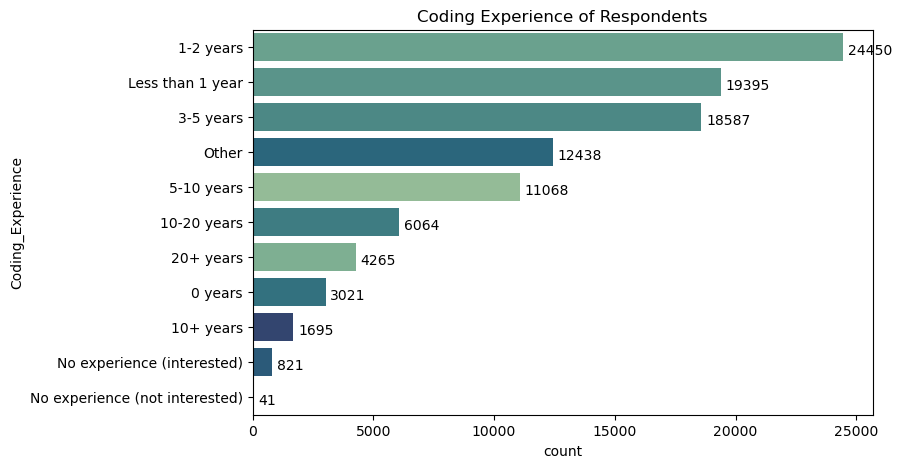

In [45]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    y="Coding_Experience",
    data=df,
    order=df["Coding_Experience"].value_counts().index,
    hue="Coding_Experience",
    dodge=False,
    legend=False,
    palette="crest"
)
plt.title("Coding Experience of Respondents")

# Add labels
for p in ax.patches:
    ax.annotate(int(p.get_width()), (p.get_width()+200, p.get_y()+0.5), va='center')

plt.show()

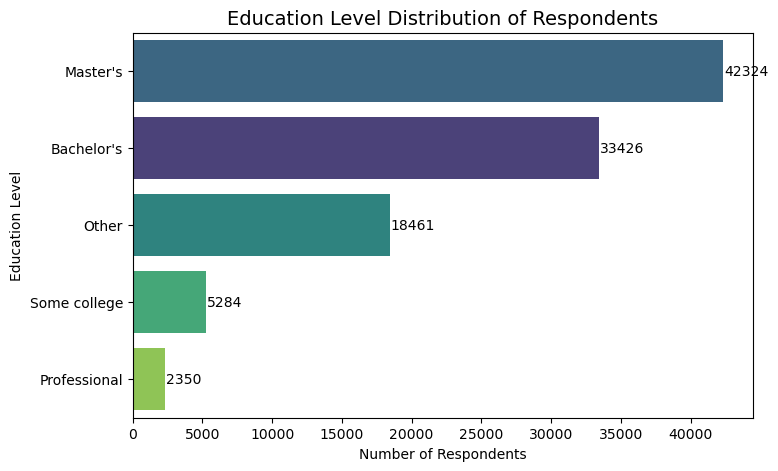

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Q4"] = df["Q4"].astype(str).str.strip()
df["Q4"] = df["Q4"].str.replace("â€™", "'", regex=False)
df["Q4"] = df["Q4"].str.replace("’", "'", regex=False)

edu_map = {
    "Bachelor's degree": "Bachelor's",
    "Master's degree": "Master's",
    "Doctoral degree": "Doctoral",
    "Professional degree": "Professional",
    "Some college/university study without earning a bachelor's degree": "Some college",
    "No formal education past high school": "High school",
    "I prefer not to answer": "Other",
    "nan": "Other"
}

df["Education_Level"] = df["Q4"].map(edu_map)
df["Education_Level"] = df["Education_Level"].fillna("Other")

# --- Step 3: Visualization ---
plt.figure(figsize=(8,5))
ax = sns.countplot(
    y="Education_Level", 
    data=df, 
    order=df["Education_Level"].value_counts().index,
    hue="Education_Level", 
    legend=False,
    palette="viridis"
)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50, p.get_y() + p.get_height()/2, int(width), ha='left', va='center')

plt.title("Education Level Distribution of Respondents", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Education Level")
plt.show()


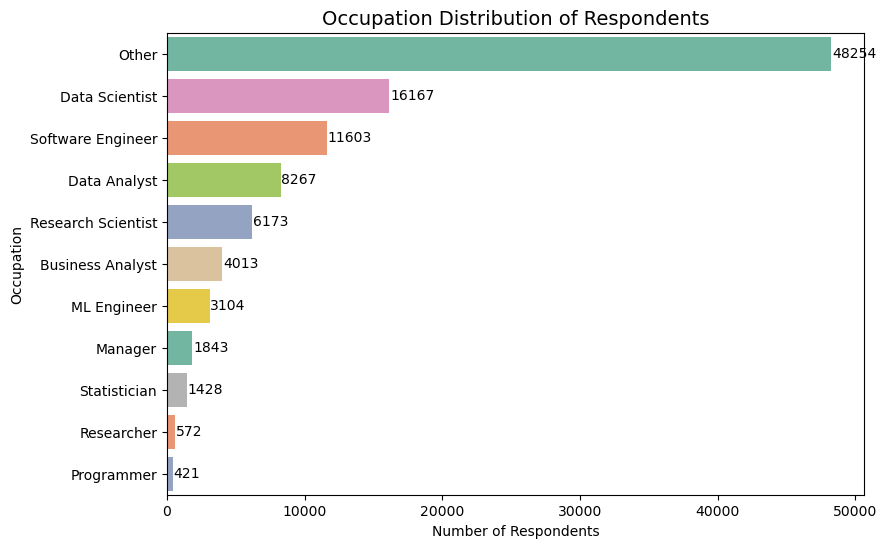

In [48]:
# --- Step 1: Clean messy characters in Q5 ---
df["Q5"] = df["Q5"].astype(str).str.strip()
df["Q5"] = df["Q5"].str.replace("â€™", "'", regex=False)
df["Q5"] = df["Q5"].str.replace("’", "'", regex=False)
df = df.copy()

# --- Step 2: Simplify occupation categories ---
role_map = {
    "Data Scientist": "Data Scientist",
    "Machine Learning Engineer": "ML Engineer",
    "Software Engineer": "Software Engineer",
    "Software Developer/Software Engineer": "Software Engineer",
    "Data Analyst": "Data Analyst",
    "Research Scientist": "Research Scientist",
    "Researcher": "Researcher",
    "Statistician": "Statistician",
    "Business Analyst": "Business Analyst",
    "Engineer (non-software)": "Engineer",
    "Product/Project Manager": "Manager",
    "Programmer": "Programmer",
    "Scientist/Researcher": "Research Scientist",
    "Salesperson": "Other",
    "Other": "Other",
    "nan": "Other"
}

df["Occupation"] = df["Q5"].map(role_map).fillna("Other")

# --- Step 3: Visualization ---
plt.figure(figsize=(9,6))
ax = sns.countplot(
    y="Occupation",
    data=df,
    order=df["Occupation"].value_counts().index,
    hue="Occupation",
    legend=False,
    palette="Set2"
)

# Add count labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50, p.get_y() + p.get_height()/2, int(width), ha="left", va="center")

plt.title("Occupation Distribution of Respondents", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Occupation")
plt.show()

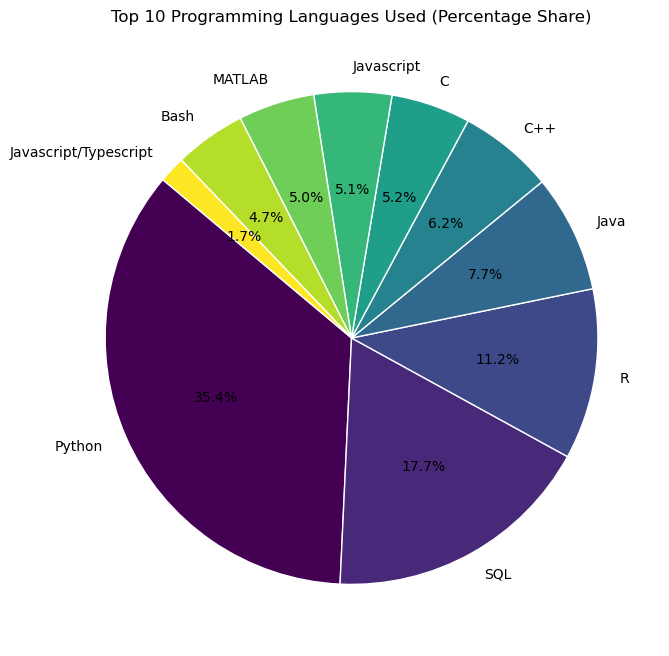

In [ ]:
q7_cols = [col for col in df.columns if "Q7_Part" in col]

df_languages = df[q7_cols].copy()
df_languages = df_languages.melt(var_name="Language_Column", value_name="Language")
df_languages = df_languages.dropna()

lang_counts = df_languages["Language"].value_counts().head(10)

top_langs = lang_counts.head(10)

plt.figure(figsize=(8,8))
colors = plt.cm.viridis(np.linspace(0,1,10))
plt.pie(top_langs.values,
        labels=top_langs.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={"edgecolor":"white", "linewidth":1})

plt.title("Top 10 Programming Languages Used (Percentage Share)")
plt.show()


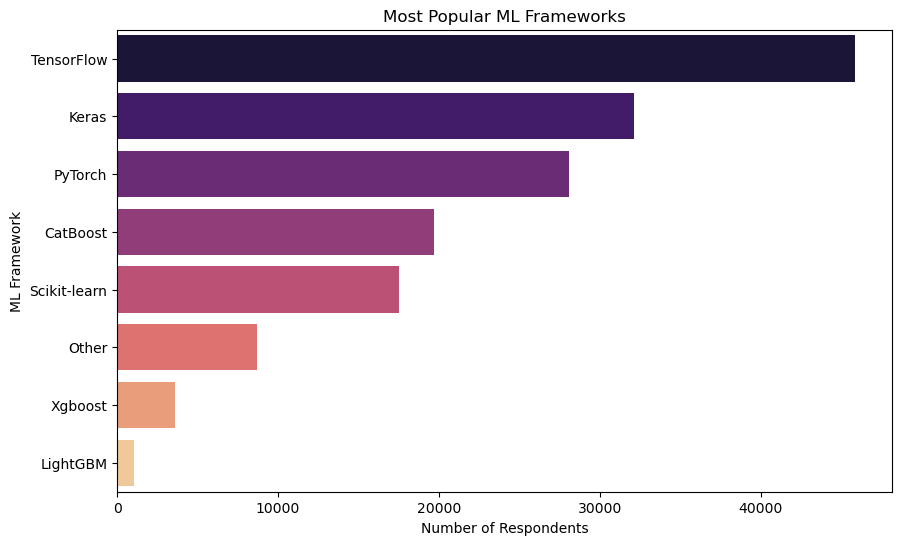

In [56]:
# Let's build a clean mapping from column name -> framework/platform
ml_framework_map = {
    "Q16_Part_1": "TensorFlow",
    "Q16_Part_2": "Keras",
    "Q16_Part_3": "PyTorch",
    "Q16_Part_4": "Scikit-learn",
    "Q16_Part_5": "Xgboost",
    "Q16_Part_6": "LightGBM",
    "Q16_Part_7": "CatBoost",
    "Q16_Part_8": "Other"
}


# ---------------------------
# Plot ML Frameworks
# ---------------------------
plt.figure(figsize=(10,6))
sns.barplot(
    x=ml_framework_counts.values,
    y=ml_framework_counts.index,
    hue=ml_framework_counts.index,
    dodge=False,
    palette="magma",
    legend=False
)
plt.title("Most Popular ML Frameworks")
plt.xlabel("Number of Respondents")
plt.ylabel("ML Framework")
plt.show()



In [57]:
cloud_cols = [col for col in df.columns if "Q27" in col]

print("Cloud-related columns found:", cloud_cols)

Cloud-related columns found: ['Q27_A_Part_1', 'Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER', 'Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4', 'Q27_B_Part_5', 'Q27_B_Part_6', 'Q27_B_Part_7', 'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 'Q27_B_Part_11', 'Q27_B_OTHER']


In [4]:
df = df.map(lambda x: str(x).replace("â€™", "'") if isinstance(x, str) else x)

In [6]:
print(df.columns[:20])


Index(['-', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4',
       'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9',
       'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12'],
      dtype='object')


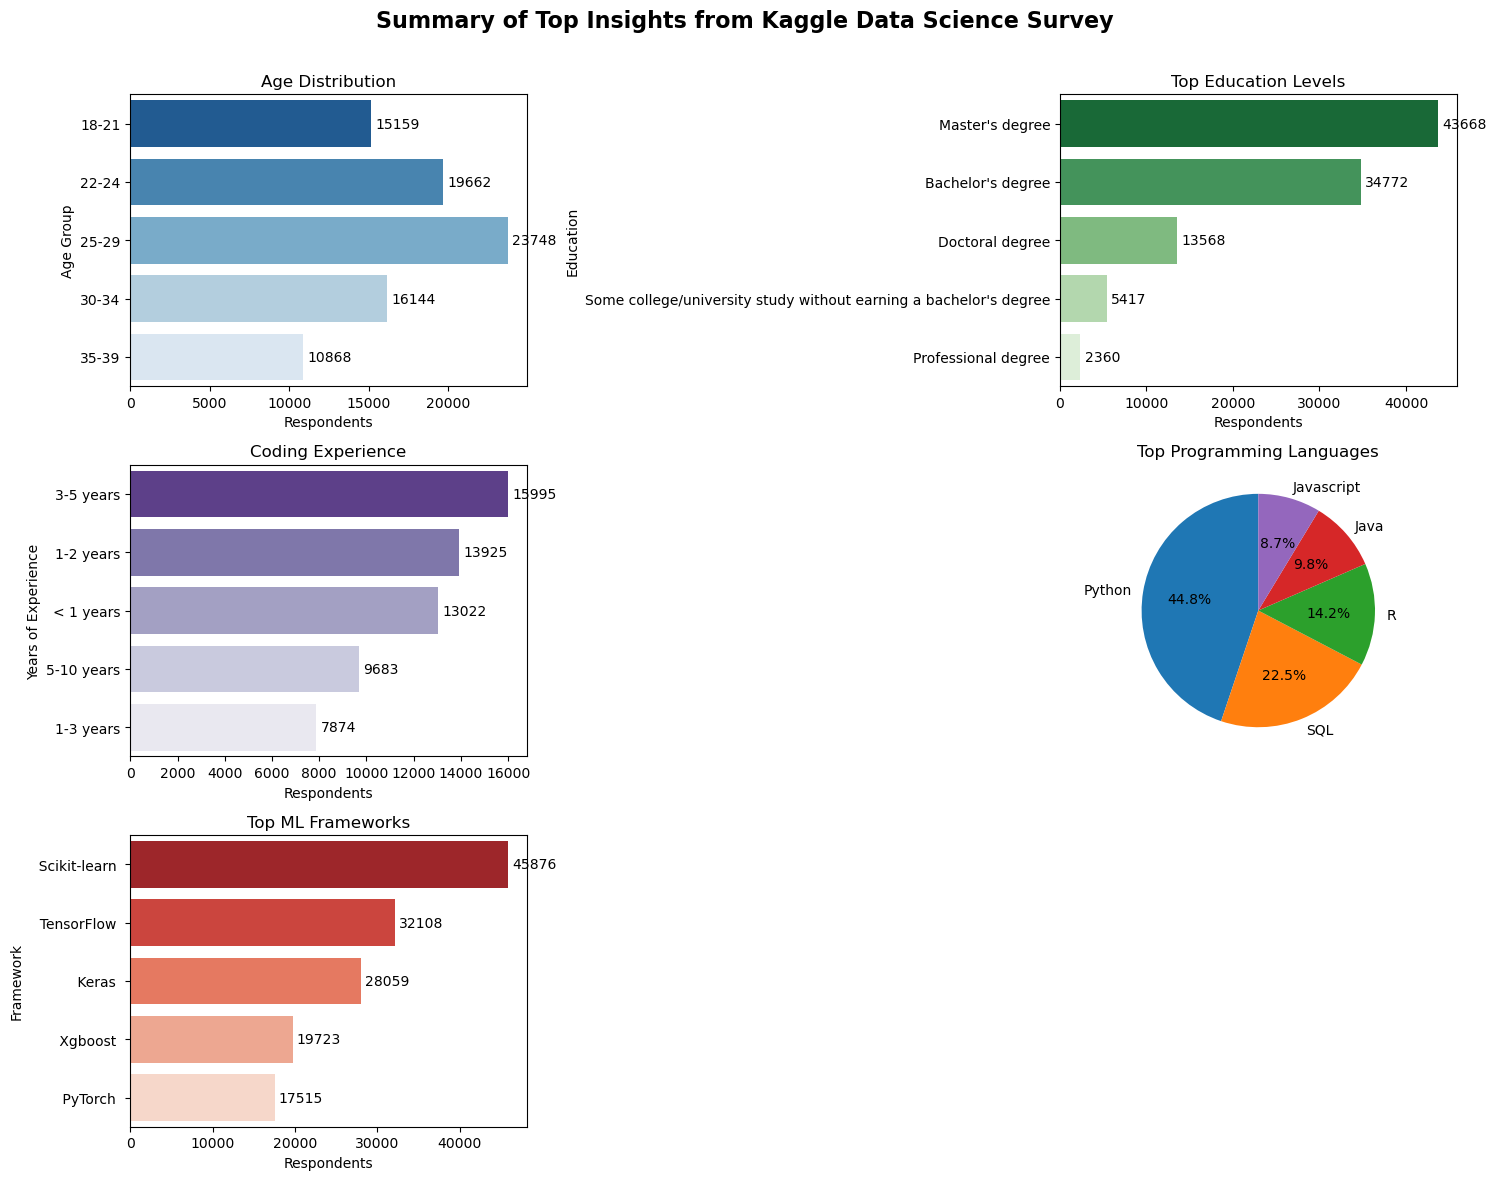

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------- Helper: use a clean working copy & skip metadata row if present ----------
df_plot = df
try:
    # If the first row looks like a metadata row (e.g., "-" == "Year"), drop it
    if str(df_plot.iloc[0, 0]).strip().lower() == "year":
        df_plot = df_plot.iloc[1:].copy()
except Exception:
    pass

# ---------- Helper: safe counts for single-choice columns ----------
def top_counts(series, top_n=5, sort_index=False):
    s = series.dropna()
    vc = s.value_counts()
    if sort_index:
        vc = vc.sort_index()
    return vc.head(top_n)

# ---------- Helper: map multi-select "Q*_Part_*" to human labels ----------
def part_cols_to_named_counts(df_in, prefix, top_n=5):
    part_cols = [c for c in df_in.columns if c.startswith(prefix)]
    if not part_cols:
        return pd.Series(dtype="int64")

    # For each "Part" column, the non-null values usually repeat the option text (e.g., "Python")
    labels = {}
    counts = {}
    for c in part_cols:
        col_vals = df_in[c].dropna().astype(str)
        if len(col_vals) == 0:
            # No selections in this part
            continue
        # Most frequent non-null value is the option label (e.g., "Python", "TensorFlow", etc.)
        label = col_vals.value_counts().index[0]
        labels[c] = label
        counts[c] = col_vals.shape[0]  # number of respondents who selected this option

    if not counts:
        return pd.Series(dtype="int64")

    counts_s = pd.Series(counts)
    # Replace index (Q*_Part_*) with readable labels
    counts_s.index = [labels[i] for i in counts_s.index]
    counts_s = counts_s.groupby(counts_s.index).sum()  # in case duplicates like "Other"
    return counts_s.sort_values(ascending=False).head(top_n)

# ---------- Build the 5 insight series ----------
# 1) Age (Q1)
age_counts = top_counts(df_plot["Q1"], top_n=5, sort_index=True)

# 2) Education (Q4)
edu_counts = top_counts(df_plot["Q4"], top_n=5)

# 3) Coding Experience (Q6)
exp_counts = top_counts(df_plot["Q6"], top_n=5)

# 4) Programming Languages (Q7_Part_*)
lang_counts = part_cols_to_named_counts(df_plot, "Q7_Part_", top_n=5)

# 5) ML Frameworks (Q16_Part_*)
ml_counts = part_cols_to_named_counts(df_plot, "Q16_Part_", top_n=5)

# ---------- Plotting helpers ----------
def add_bar_labels(ax, fmt="%d"):
    # Works for barplot / barh created via seaborn
    for container in ax.containers:
        try:
            ax.bar_label(container, fmt=fmt, label_type="edge", padding=3)
        except Exception:
            pass

# ---------- Dashboard ----------
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Summary of Top Insights from Kaggle Data Science Survey", fontsize=16, fontweight="bold")

# 1) Age (horizontal bar)
ax = sns.barplot(
    x=age_counts.values,
    y=age_counts.index,
    hue=age_counts.index,   # fixes palette warning
    dodge=False, legend=False,
    ax=axes[0,0], palette="Blues_r"
)
axes[0,0].set_title("Age Distribution")
axes[0,0].set_xlabel("Respondents")
axes[0,0].set_ylabel("Age Group")
add_bar_labels(ax)

# 2) Education
ax = sns.barplot(
    x=edu_counts.values,
    y=edu_counts.index,
    hue=edu_counts.index,
    dodge=False, legend=False,
    ax=axes[0,1], palette="Greens_r"
)
axes[0,1].set_title("Top Education Levels")
axes[0,1].set_xlabel("Respondents")
axes[0,1].set_ylabel("Education")
add_bar_labels(ax)

# 3) Coding Experience
ax = sns.barplot(
    x=exp_counts.values,
    y=exp_counts.index,
    hue=exp_counts.index,
    dodge=False, legend=False,
    ax=axes[1,0], palette="Purples_r"
)
axes[1,0].set_title("Coding Experience")
axes[1,0].set_xlabel("Respondents")
axes[1,0].set_ylabel("Years of Experience")
add_bar_labels(ax)

# 4) Programming Languages (Pie)
axes[1,1].set_title("Top Programming Languages")
if len(lang_counts) > 0:
    axes[1,1].pie(
        lang_counts.values,
        labels=lang_counts.index,
        autopct='%1.1f%%',
        startangle=90
    )
else:
    axes[1,1].text(0.5, 0.5, "No language data", ha="center", va="center")
    axes[1,1].set_axis_off()

# 5) ML Frameworks
ax = sns.barplot(
    x=ml_counts.values,
    y=ml_counts.index,
    hue=ml_counts.index,
    dodge=False, legend=False,
    ax=axes[2,0], palette="Reds_r"
)
axes[2,0].set_title("Top ML Frameworks")
axes[2,0].set_xlabel("Respondents")
axes[2,0].set_ylabel("Framework")
add_bar_labels(ax)

# Hide the empty bottom-right subplot
axes[2,1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
